<a href="https://colab.research.google.com/github/111Vidya/DS-Assignments/blob/main/Assignment_Clustering(EastWestAirlines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heirarchical Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ew=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
ew

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
ew.shape

(3999, 12)

In [ ]:
ew.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
ew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
#Normalising with SK learn minmax function
#converting all our values bw 0 and 1 with min max function
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
ew_norm= pd.DataFrame(trans.fit_transform(ew.iloc[:,1:]))
ew_norm

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [ ]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

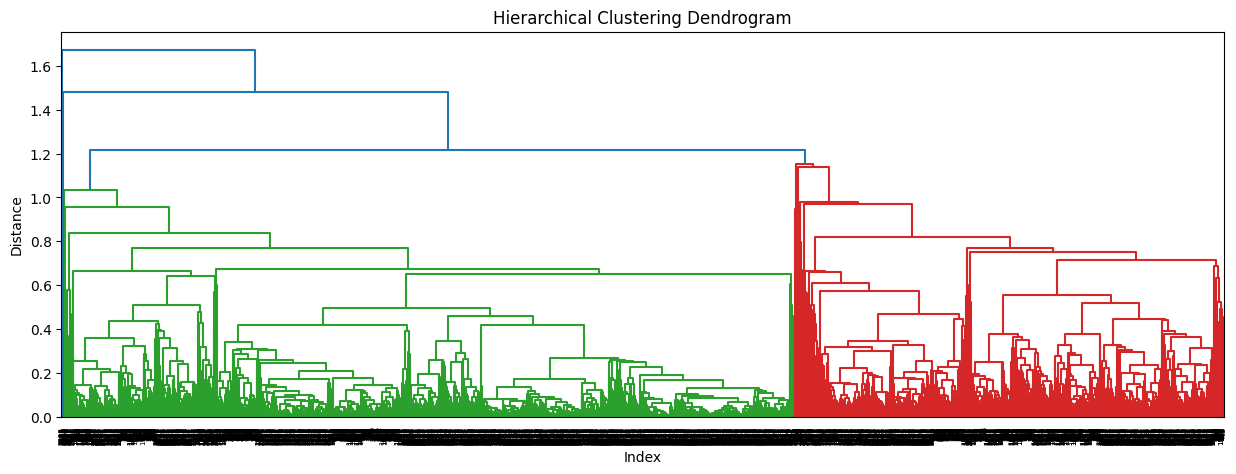

In [ ]:
#Dendrogram
z = linkage(ew_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,)
plt.show()

In [ ]:
#Adding a cluster number(1to5) to data set
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(ew_norm)
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
ew['clust']=cluster_labels
ew

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [ ]:
#Group data set by cluster number
ew.iloc[:,1:].groupby(ew.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,9.597426e+04,240.572888,2.656676,1.015668,1.000681,28342.702997,15.547003,804.152589,2.461853,4627.118529,1.0,0.0
1,5.980784e+04,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.0
2,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0,2.0
3,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0,3.0
4,7.656512e+04,147.750000,3.875000,1.000000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000,1.0,4.0


In [ ]:
#data in each cluster from 0 to 4
data = ew[(ew.clust==0)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0


In [ ]:
data = ew[(ew.clust==1)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [ ]:
data = ew[(ew.clust==2)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,2


In [ ]:
data = ew[(ew.clust==3)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,3
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,3
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,3


In [ ]:
data = ew[(ew.clust==4)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,4
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,4
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,4
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,4
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,4
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,4
2364,2382,108081,0,5,1,5,217006,24,0,0,3567,1,4


In [ ]:
# convert dataset to Z score , standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ew_subset = pd.DataFrame(scaler.fit_transform(ew.iloc[:,1:11]))
ew_subset

,0,1,2,3,4,5,6,7,8,9
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


<Figure size 1500x500 with 0 Axes>

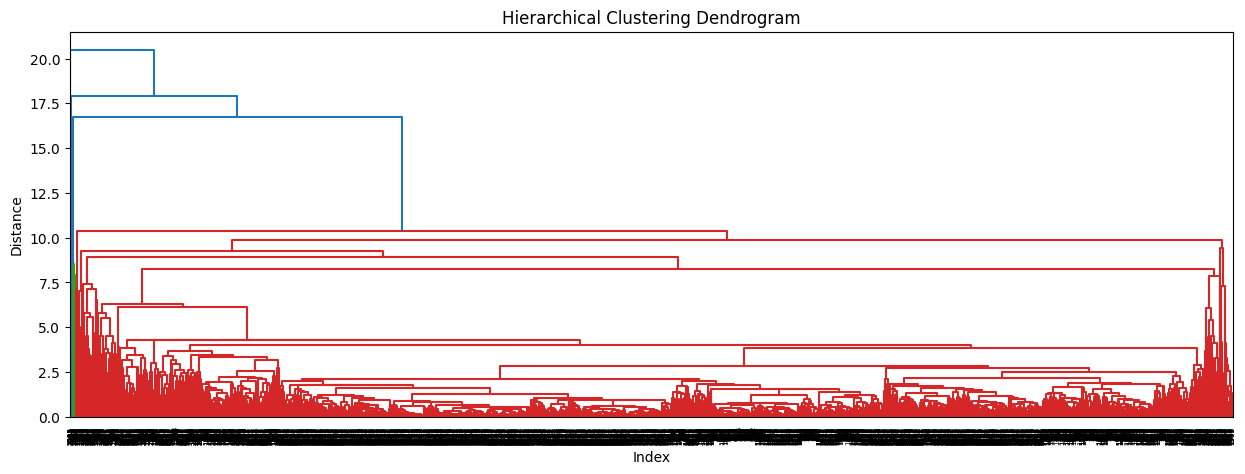

In [ ]:
# euclidean distance and linkage and dendrogram
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(ew_subset, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(ew_subset)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
ew['clust']=cluster_labels
ew

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
ew.iloc[:,1:].groupby(ew.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,7.288966e+04,144.193013,2.054034,1.014577,1.000754,16806.654184,11.476753,439.180699,1.319176,4117.825333,0.368937,0.0
1,1.380614e+05,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,1.0
2,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.000000,2.0
3,1.226280e+05,296.000000,3.000000,1.000000,1.000000,63527.666667,63.666667,16341.000000,48.000000,2476.000000,1.000000,3.0
4,1.601140e+05,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.000000,4.0


In [ ]:
data = ew[(ew.clust==0)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
data = ew[(ew.clust==1)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,1
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,1
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,1
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,1
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,1
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,1
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,1
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,1
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,1
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,1


In [ ]:
data = ew[(ew.clust==2)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,2


In [ ]:
data = ew[(ew.clust==3)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,3
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,3


In [ ]:
data = ew[(ew.clust==4)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,4


KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#standardise with max min fn or standardise with zscore with standard scaler
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [ ]:
ew_norm = norm_func(ew.iloc[:,1:])
ew_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0.0


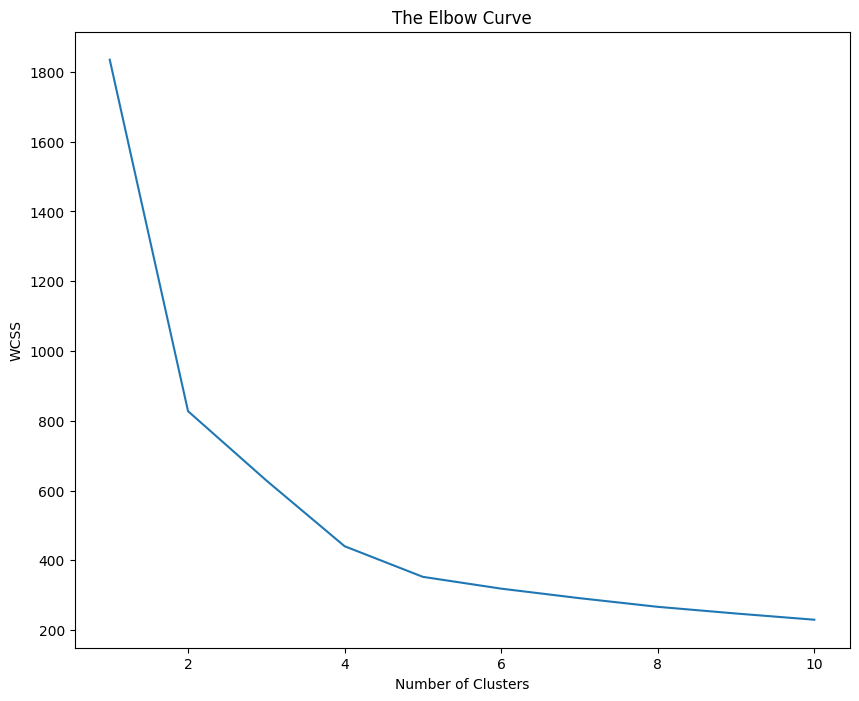

In [ ]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(ew_norm)
    WCSS.append(clf.inertia_)
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Curve')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [ ]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(ew_norm)

In [ ]:
y_kmeans
clf.labels_

array([0, 0, 0, ..., 1, 2, 2], dtype=int32)

In [ ]:
y_kmeans

array([0, 0, 0, ..., 1, 2, 2], dtype=int32)

In [ ]:
clf.cluster_centers_

array([[ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01,  3.44169138e-15, -2.29850861e-17],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00,  3.71287129e-03],
       [ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01, -3.33066907e-16,  4.84496124e-04],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.33066907e-16,  2.02265372e-03],
       [ 4.89953609e-02,  2.60542873e-02,  3.9004457

In [ ]:
clf.inertia_

352.7931755478243

In [ ]:
md=pd.Series(y_kmeans)
ew['clust']=md
ew

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [ ]:
ew.iloc[:,1:].groupby(ew.clust).mean()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,0.0
1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,1.0
2,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,2.0
3,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,3.0
4,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,4.0


Text(0.5, 1.0, 'Clusters using KMeans')

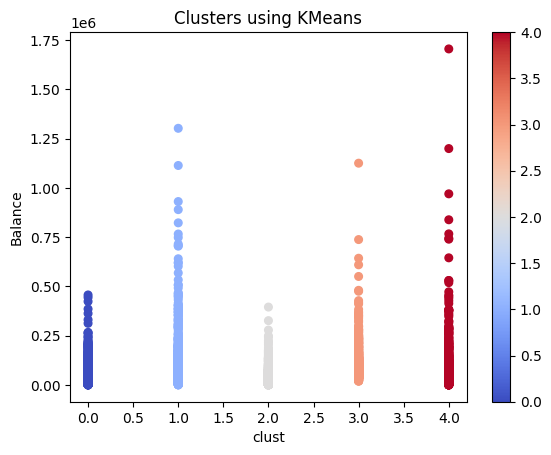

In [ ]:
ew.plot(x="clust",y ="Balance",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

In [ ]:
WCSS

[1834.6541468419077,
 827.5271577265291,
 629.0268719060575,
 440.55883411685943,
 352.7931755478243,
 318.99428142463006,
 291.74343509574777,
 266.8938789188546,
 247.74877585023262,
 229.95301324842166]

In [ ]:
clf = KMeans(n_clusters=6)
y_kmeans = clf.fit_predict(ew_norm)
y_kmeans
clf.labels_

array([3, 3, 3, ..., 2, 0, 0], dtype=int32)

In [ ]:
y_kmeans

array([3, 3, 3, ..., 2, 0, 0], dtype=int32)

In [ ]:
clf.cluster_centers_

array([[ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01, -3.33066907e-16,  4.84496124e-04],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00,  4.08618128e-03],
       [ 4.11682179e-02,  1.45995017e-02,  6.20046620e-01,
        -2.51534904e-17,  5.82750583e-04,  1.16176472e-01,
         2.14587738e-01,  1.70850663e-02,  3.02590491e-02,
         4.42052642e-01,  1.00000000e+00,  1.74825175e-03],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
         8.03906334e-02,  7.91232441e-03,  1.37379358e-02,
         6.71078504e-01,  3.44169138e-15, -2.29850861e-17],
       [ 6.93891884e-02,  6.59020789e-03,  6.4603559

In [ ]:
clf.inertia_

318.99735585168514

In [ ]:
md=pd.Series(y_kmeans)
ew['clust']=md
ew

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
ew.iloc[:,1:].groupby(ew.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,0.0
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,1.0
2,70138.179070,162.376744,3.481395,1.000000,1.002326,30665.416279,18.474419,531.123256,1.609302,3671.023256,1.0,2.0
3,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,3.0
4,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0,4.0
5,151748.761905,239.243386,4.410053,1.002646,1.052910,62609.719577,22.166667,921.455026,2.748677,6219.891534,1.0,5.0


Text(0.5, 1.0, 'Clusters using KMeans')

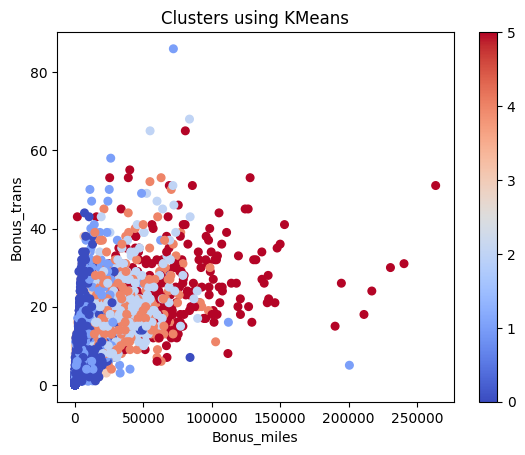

In [ ]:
ew.plot(x="Bonus_miles",y ="Bonus_trans",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

Clusters are overlapping with K values as 5 and 6

DBSCAN Clustering Method

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
array=ew.values
array

array([[    1, 28143,     0, ...,  7000,     0,     3],
       [    2, 19244,     0, ...,  6968,     0,     3],
       [    3, 41354,     0, ...,  7034,     0,     3],
       ...,
       [ 4019, 73597,     0, ...,  1402,     1,     2],
       [ 4020, 54899,     0, ...,  1401,     0,     0],
       [ 4021,  3016,     0, ...,  1398,     0,     0]])

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01,  5.16260303e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01,  5.16260303e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01,  5.16260303e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -7.39412269e-02],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -1.25434429e+00],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -1.25434429e+00]])

In [ ]:
neigh = NearestNeighbors(n_neighbors=26)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [ ]:
ew.shape

(3999, 13)

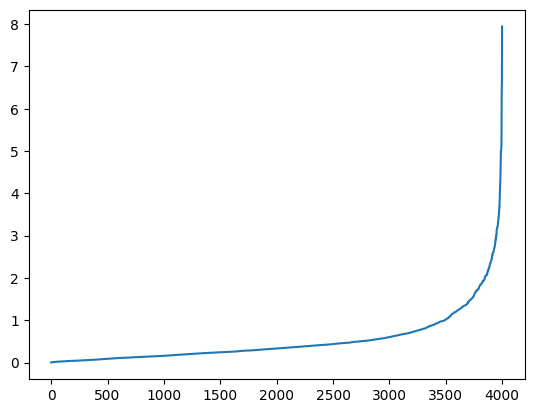

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=13)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=13)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 1, 3, 3])

In [ ]:
ew1=pd.DataFrame(dbscan.labels_,columns=['cluster'])
ew1

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,1
3997,3


In [ ]:
ew2 = pd.concat([ew,ew1],axis=1)
ew2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,3


Text(0.5, 1.0, 'Clusters using DBScan')

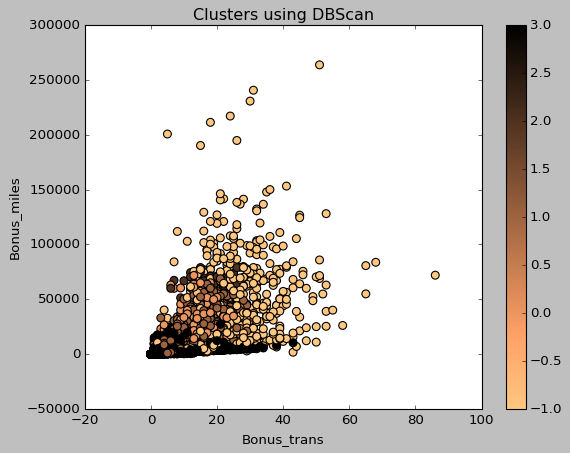

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
ew2.plot(x="Bonus_trans",y ="Bonus_miles",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r)
plt.title('Clusters using DBScan')

In [ ]:
dl = dbscan.labels_

In [ ]:
import sklearn
sklearn.metrics.silhouette_score(X, dl)

0.21369894487375293